[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mauro-moura/GA-023-Trabalho-Final/blob/main/02_data_preprocessing.ipynb)

In [1]:
import os

import glob
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

In [2]:
def load_images(files, resize=(256,256)):
    images = []
    for file in files:
        im = Image.open(file)
        im = ImageOps.exif_transpose(im)
        if resize:
            im = im.resize(resize)
        im = im.convert('L')
        images.append(np.array(im))
    return np.array(images)

In [3]:
BASE_OUTPUT_PATH = 'outputs'

In [4]:
mode = ['images', 'masks']
BASE_PATH_IMGS = os.path.join('data', mode[0])
BASE_PATH_MASKS = os.path.join('data', mode[1])
files = glob.glob(os.path.join(BASE_PATH_IMGS, '*'))
files_masks = glob.glob(os.path.join(BASE_PATH_MASKS, '*'))

In [5]:
images = load_images(files)

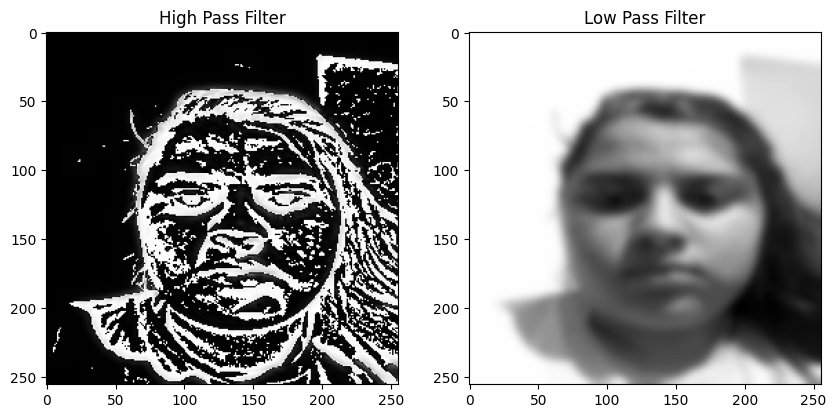

In [6]:
from scipy.ndimage import gaussian_filter
from skimage import morphology

def preprocess_images(image):
    # Preprocess images to apply a high pass (edge detection) and a Gaussian Filter (low pass)
    low_pass_filter = gaussian_filter(image, sigma=3)
    high_pass_filter = image - low_pass_filter
    return high_pass_filter, low_pass_filter

high_pass_filter, low_pass_filter = preprocess_images(images[0])

# qntd_dilation = 1
# footprint = morphology.square(5)
# for i in range(qntd_dilation):
#     high_pass_filter = morphology.erosion(high_pass_filter, footprint)
#     high_pass_filter = morphology.dilation(high_pass_filter, footprint)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(high_pass_filter, cmap='gray')
plt.title('High Pass Filter')
plt.subplot(1,2,2)
plt.imshow(low_pass_filter, cmap='gray')
plt.title('Low Pass Filter')
plt.savefig(os.path.join(BASE_OUTPUT_PATH, 'low_pass_high_pass_filter.png'), bbox_inches='tight')
plt.show()

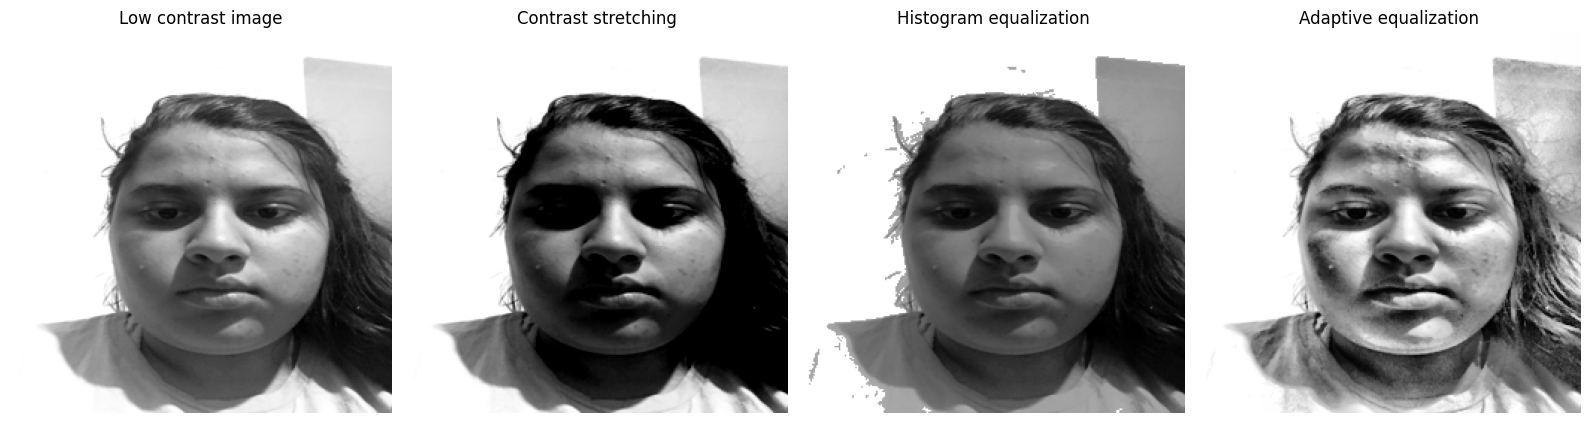

In [7]:
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np

def plot_img(image, ax):
    """Plot only the image."""
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_axis_off()
    return ax

img = images[0]

# Contrast stretching
lim = 15
p2, p98 = np.percentile(img, (lim, 100 - lim))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Number of rows for the subplot
qntd_rows = 1

# Display results
fig, axes = plt.subplots(qntd_rows, 4, figsize=(16, 9))
axes = axes.ravel()  # Flatten axes array for easier indexing

# Display each image
plot_img(img, axes[0]).set_title('Low contrast image')
plot_img(img_rescale, axes[1]).set_title('Contrast stretching')
plot_img(img_eq, axes[2]).set_title('Histogram equalization')
plot_img(img_adapteq, axes[3]).set_title('Adaptive equalization')

# Prevent overlap of titles
fig.tight_layout()
plt.savefig(os.path.join(BASE_OUTPUT_PATH, 'contrast_stretching.png'), bbox_inches='tight')
plt.show()